# 6. Write a program to perform following operations for sharpening an image:
    a. Take an image (attached)
    b. Apply Laplacian filter
    c. Obtain sharpen image by adding ‘a’ and ‘b’



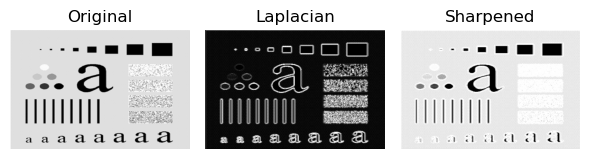

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Cannot read image at {path}")
    return img

def laplacian_sharpening(image):
    lap = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
    lap = np.clip(lap, -255, 255) 
    lap_abs = cv2.convertScaleAbs(lap)  

    sharpened = cv2.add(image, lap_abs)
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    return lap_abs, sharpened

def plot_results(original, laplacian, sharpened):
    plt.figure(figsize=(6, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(laplacian, cmap='gray')
    plt.title("Laplacian")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sharpened, cmap='gray')
    plt.title("Sharpened")
    plt.axis('off')

    plt.tight_layout()
    plt.savefig("outimg_problem6.png")
    plt.show()

def main():
    img_path = "../test_imgs/test_img.png"
    img = read_image(img_path)

    laplacian, sharpened = laplacian_sharpening(img)
    plot_results(img, laplacian, sharpened)

if __name__ == "__main__":
    main()
